In [32]:
#importam librariele necesare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import itertools
warnings.filterwarnings(action='ignore')
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
import statsmodels.api as sm

In [33]:
from google.colab import files
data = files.upload()#incarcarea datelor

Saving Sales.xls to Sales (1).xls


In [34]:
import io#citirea a datelor
df = pd.read_excel(io.BytesIO(data['Sales.xls']))

In [35]:
df.head()#arata cele 5 randuri inceput de la date

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [36]:
df.tail() #arata cele 5 randuri in sfarsit de la date

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [37]:
df.shape #comanda returnează un tuplu reprezentând dimensiunile unui DataFrame în format

(9994, 21)

In [38]:
df.info()#pentru a afisa informatii despre dataset  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [39]:
df.describe()# pentru a genera statistici descriptive ale coloanelor numerice ale unui DataFrame

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [40]:
df.columns #toate coloanele

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Preprocesarea datelor.Gestionarea valorilor lipsă

In [41]:
df.isnull().sum() #returnează numărul de valori lipsă în fiecare coloană a unui DataFrame.Nu avem nicio valoare lipsa

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [42]:
df=df.dropna(axis=0) 

In [43]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [44]:
df.shape # new shape

(9994, 21)

Correlatia Si Heatmap


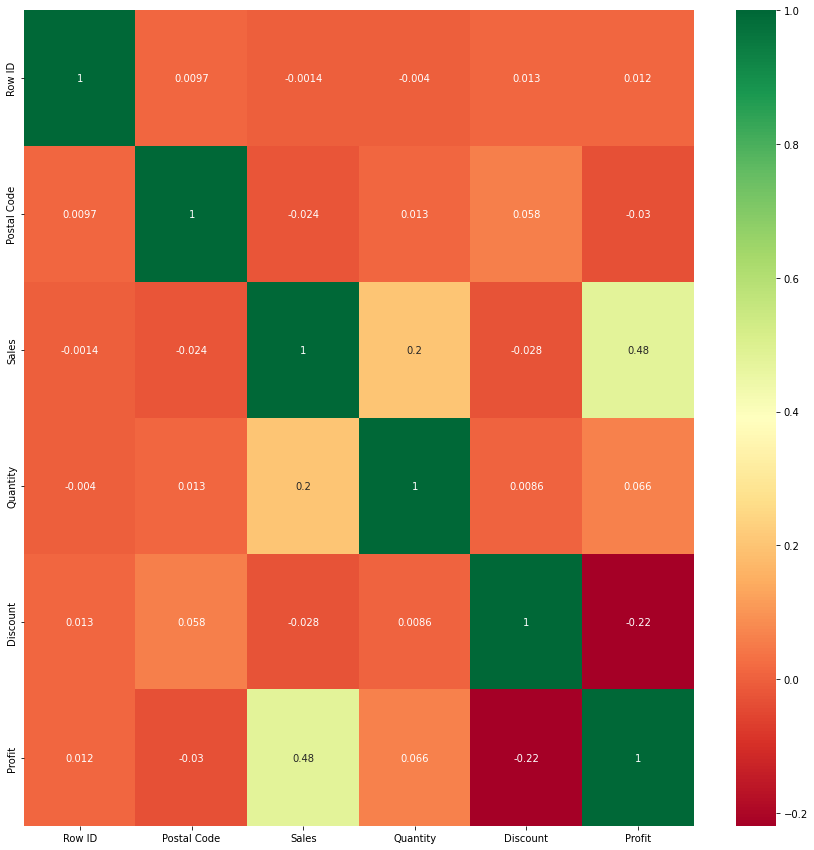

In [45]:
corrmat=df.corr()
top_corr=corrmat.index
plt.figure(figsize=(15,15))
#plot heatmap
g=sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

Din Heatmap putem vedea că Profit, Discount au cea mai mică corelație

In [46]:
df.drop(['Row ID','Ship Date','Ship Mode','Customer ID','Postal Code','Order ID','Profit','Discount'],axis=1,inplace=True) 

In [47]:
df.to_csv('train1.csv')

In [48]:
print(df.shape)
df.head()

(9994, 13)


,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
0,2016-11-08,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2
1,2016-11-08,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,2016-06-12,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2
3,2015-10-11,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5
4,2015-10-11,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2


Întrebări de analiză:
ce stat din SUA are o frecvență mai mare de vânzări?
in ce an am avut vanzari maxime?
in ce luna avem vanzari maxime?
care zile ale lunii generează vânzări mai mari?
care sunt primele 10 state cu vânzări mari?
care sunt primele 20 de orașe cu vânzări mari?
produse de top foarte solicitate?
Cei mai frecventi clienti?

In [52]:
df['Country'].unique()# Determinarea categoriilor din coloana Country de la DataFrame

array(['United States'], dtype=object)

Am descoperit că înregistrările sunt în întregime ale Statelor Unite.

In [53]:
states=df['State'].unique()
np.count_nonzero(states)

49

In [54]:
cities=df['City'].unique()
np.count_nonzero(cities)

531

In [55]:
top_cities= df['City'].value_counts().nlargest(20)
top_cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

New York are cele mai mari vânzări din toată SUA

In [56]:
top_customers= df['Customer Name'].value_counts().nlargest(20)
top_customers

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Arthur Prichep         31
Lena Cacioppo          30
Sally Hughsby          29
Dean percer            29
Brian Moss             29
Greg Tran              29
Ken Lonsdale           29
Keith Dawkins          28
Clay Ludtke            28
Kunst Miller           28
Name: Customer Name, dtype: int64

William Brown este cel mai frecvent client aici. Să explorăm mai multe despre William Brown!!

In [57]:
rslt_df = df[df['Customer Name'] == 'William Brown'] 
rslt_df.head()

,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
2133,2015-11-30,William Brown,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,152.991,3
2134,2015-11-30,William Brown,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-FA-10000053,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,10.584,7
2135,2015-11-30,William Brown,Consumer,United States,Philadelphia,Pennsylvania,East,TEC-PH-10002807,Technology,Phones,Motorla HX550 Universal Bluetooth Headset,94.920,4
2148,2014-12-12,William Brown,Consumer,United States,Concord,California,West,FUR-FU-10003975,Furniture,Furnishings,Eldon Advantage Chair Mats for Low to Medium P...,43.310,1
3741,2016-01-15,William Brown,Consumer,United States,New York City,New York,East,OFF-EN-10001137,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.520,4


In [58]:
category=df['Category'].unique()
print(category)
print(np.count_nonzero(category))

['Furniture' 'Office Supplies' 'Technology']
3


Există 3 categorii de produse în Supermarket- Furnutire, Office Supplies, Technology


Text(0, 0.5, 'Count')

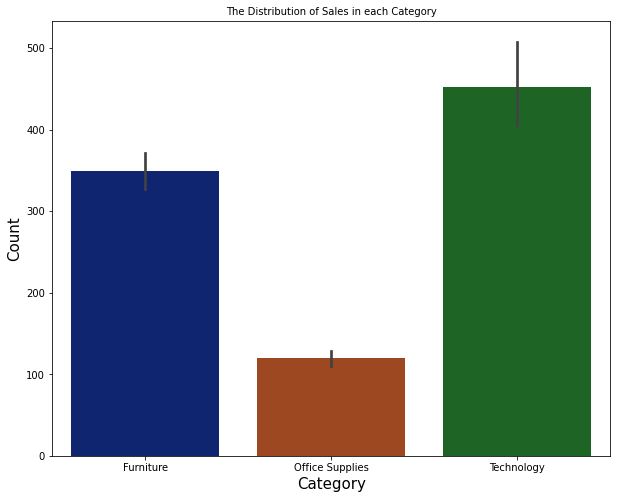

In [59]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.barplot(x = df['Category'], y = df['Sales'], palette ='dark')
plt.title('The Distribution of Sales in each Category', fontsize = 10)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [ ]:
subcategory=df['Sub-Category'].unique()
print(subcategory)
print(np.count_nonzero(subcategory))

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
17


Text(0, 0.5, 'Count')

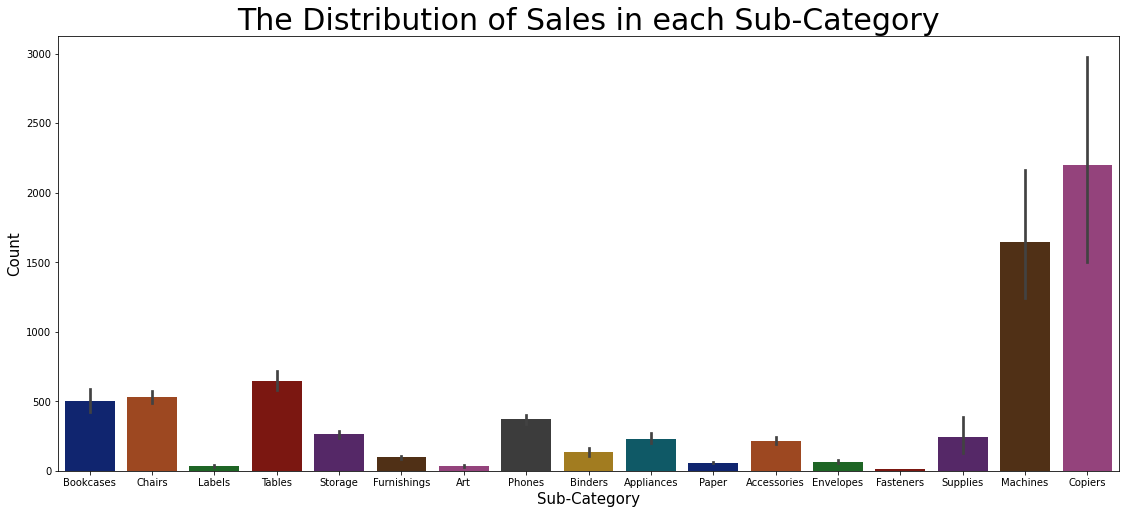

In [60]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = df['Sub-Category'], y = df['Sales'], palette ='dark')
plt.title('The Distribution of Sales in each Sub-Category', fontsize = 30)
plt.xlabel('Sub-Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [61]:
top_products= df['Sub-Category'].value_counts().nlargest(5)
top_products

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Name: Sub-Category, dtype: int64

In [62]:
segment=df['Segment'].unique()
print(segment)
print(np.count_nonzero(segment))

['Consumer' 'Corporate' 'Home Office']
3


Text(0, 0.5, 'Count')

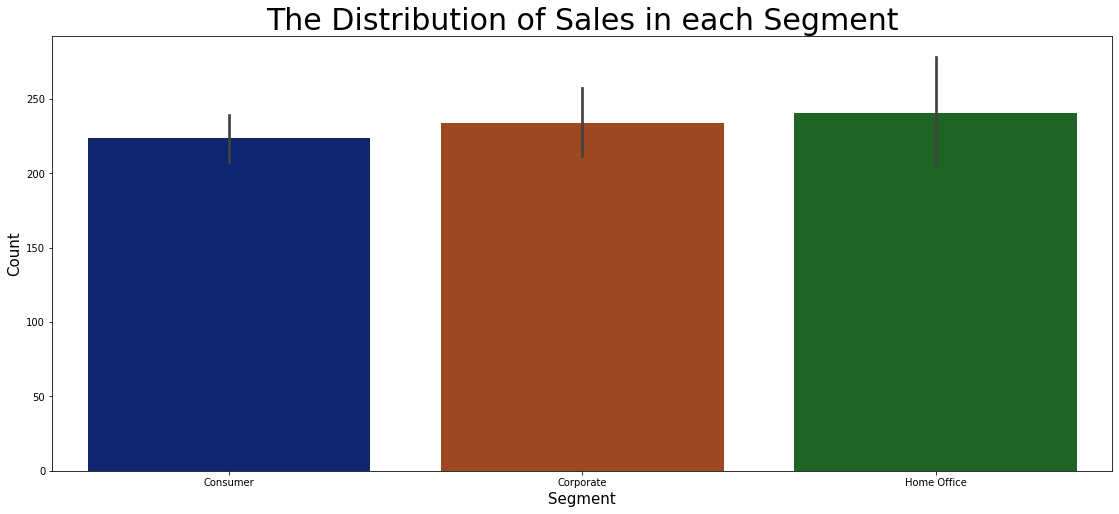

In [65]:
#vizualizarea distribuției pe segmente a vânzărilor
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = df['Segment'], y = df['Sales'], palette ='dark')
plt.title('The Distribution of Sales in each Segment', fontsize = 30)
plt.xlabel('Segment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)



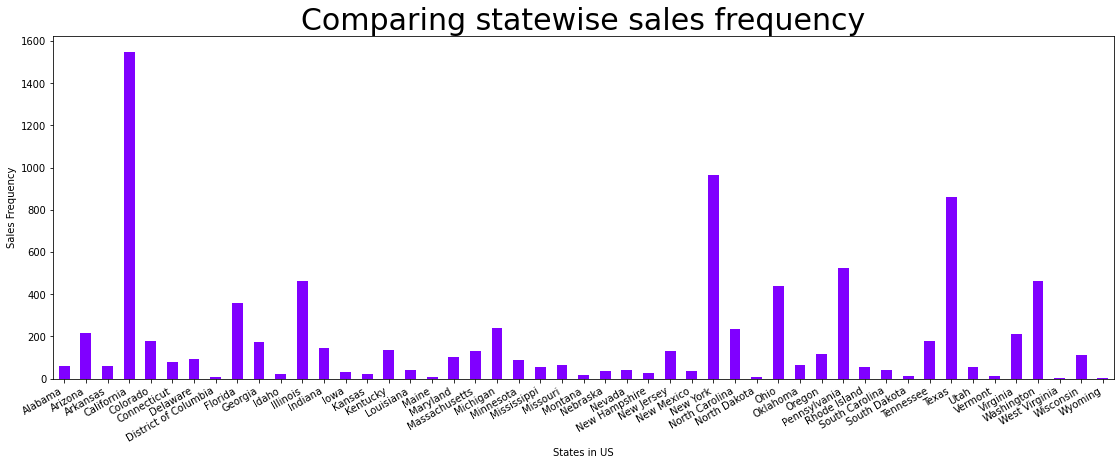

In [66]:
#vizualizarea distribuției vânzărilor la nivel de stat
df.groupby(['State'])['Sales'].nunique().plot.bar(figsize = (19, 7), cmap= 'rainbow')
plt.gcf().autofmt_xdate()
plt.title('Comparing statewise sales frequency', fontsize = 30)
plt.xlabel('States in US', fontsize = 10)
plt.ylabel('Sales Frequency')
plt.show()

In [67]:
top_states= df['State'].value_counts().nlargest(10)
top_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [68]:
print(df['State'].max())#California are vânzări de înaltă frecvență, în timp ce Wyoming are prețul total de vânzare maxim.

Wyoming


Distribuția totală a vânzărilor

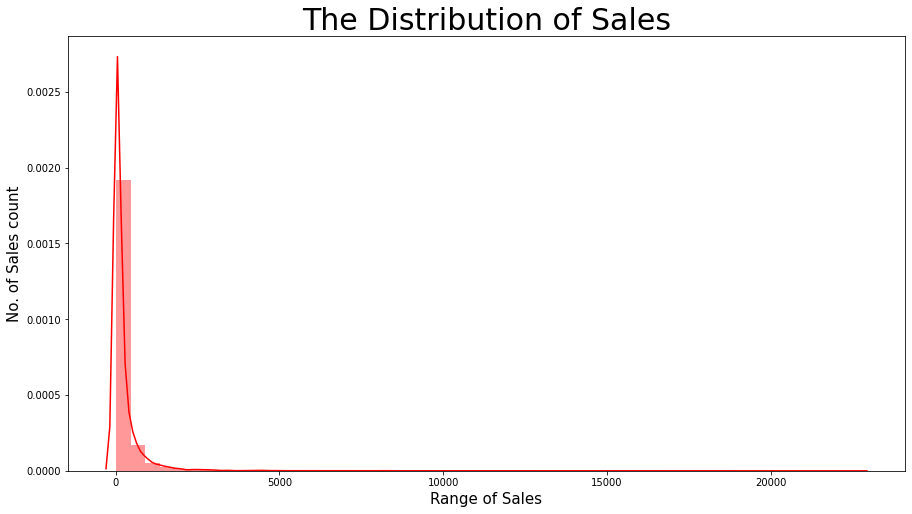

In [69]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(df['Sales'], color = 'red')
plt.title('The Distribution of Sales', fontsize = 30)
plt.xlabel('Range of Sales', fontsize = 15)
plt.ylabel('No. of Sales count', fontsize = 15)
plt.show()

In [72]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce') # era deja obiect datetime înainte, nu un pas necesar

In [73]:
#extragerea Year out of the Date pentru a face o analiză anuală
df['Year'] = df['Order Date'].dt.year

In [74]:
#extragerea Month din Data pentru a face o analiză lunară
df['Month'] = df['Order Date'].dt.month

In [75]:
df['Date'] = df['Order Date'].dt.day

In [76]:
df.columns

Index(['Order Date', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Year', 'Month', 'Date'],
      dtype='object')

In [77]:
# separarea caracteristicilor dependente de cele independente
X=df.copy()
X.drop(['Sales'],axis=1,inplace=True)
X.head() # caracteristici independente

,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Year,Month,Date
0,2016-11-08,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,2016,11,8
1,2016-11-08,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,2016,11,8
2,2016-06-12,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,2016,6,12
3,2015-10-11,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,2015,10,11
4,2015-10-11,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,2015,10,11


In [78]:
y=df.iloc[:,11] # țintă, precum și caracteristică dependentă
y.head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales Price')

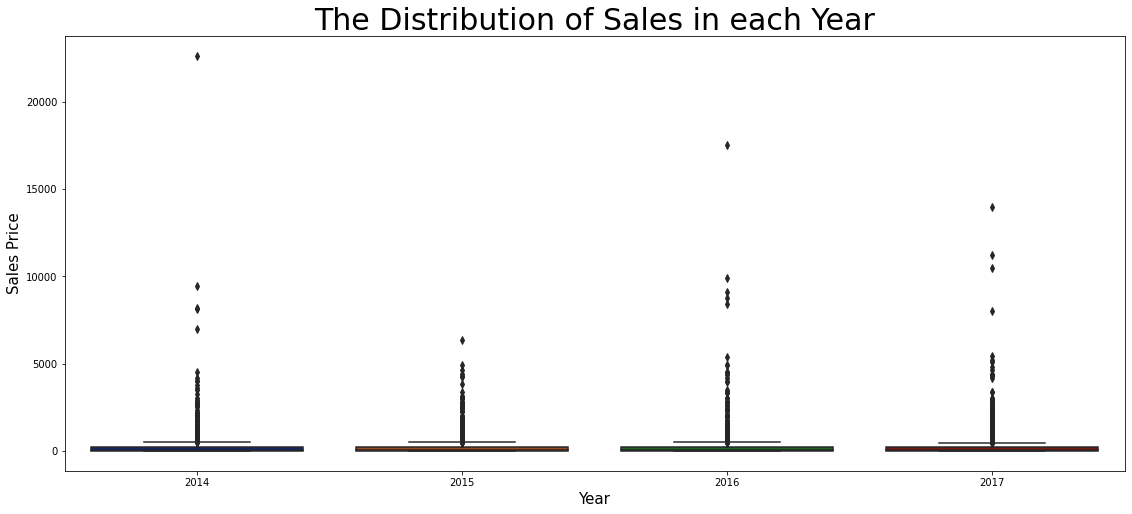

In [79]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = df['Year'], y = df['Sales'], palette ='dark')
plt.title('The Distribution of Sales in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales Price', fontsize = 15)

In [80]:
year_max=df[df['Sales'] == 22638.480000] 
year_max

,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Year,Month,Date
2697,2014-03-18,Sean Miller,Home Office,United States,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,2014,3,18


Text(0, 0.5, 'Sales')

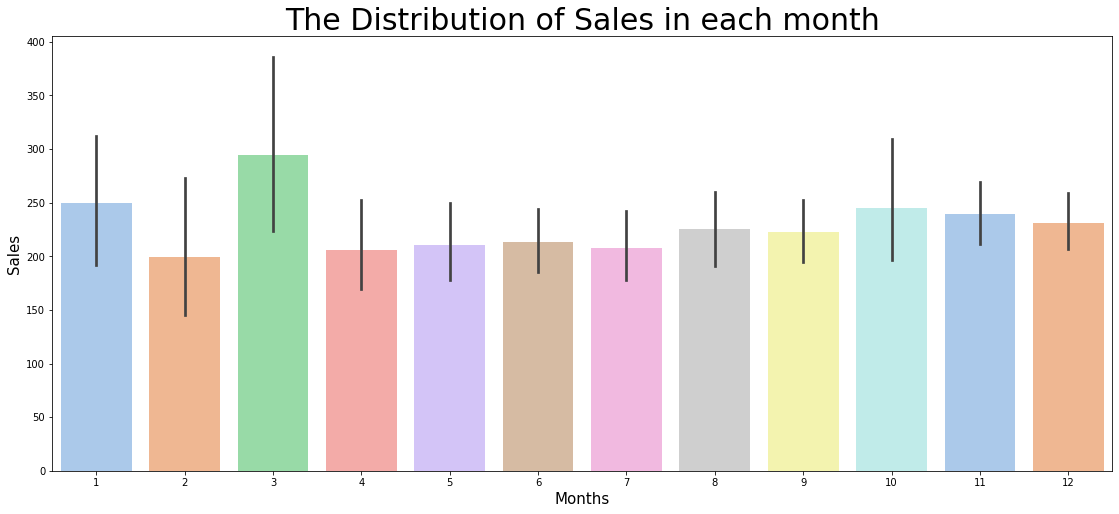

In [81]:
#vizualizarea distribuției lunare a vânzărilor
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = df['Month'], y = df['Sales'], palette ='pastel')
plt.title('The Distribution of Sales in each month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

Text(0, 0.5, 'Sales')

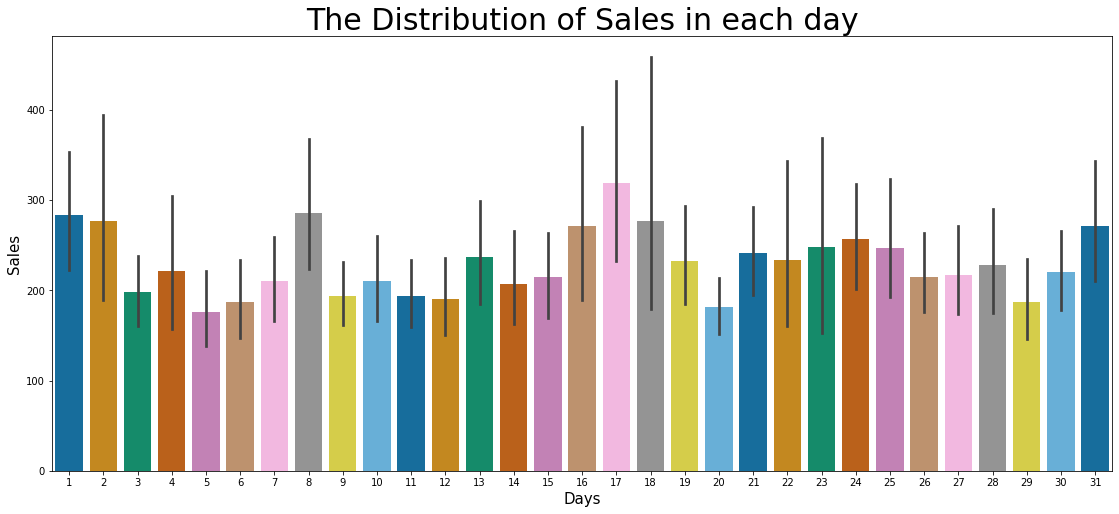

In [82]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x = df['Date'], y = df['Sales'], palette ='colorblind')
plt.title('The Distribution of Sales in each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

Distribuția vânzărilor pe parcursul lunii continuă să varieze; Se observă că cea mai mare este în mare parte la mijlocul lunii.

Analiza serii de timp a vânzărilor și a datei comenzii

In [87]:
#extragerea lor într-un cadru de date separat
features=['Order Date','Sales']
salesplot=df[features]
salesplot.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


Datele de comandă nu sunt în ordine sortată, prin urmare sortarea cadrului de date în funcție de dată

In [84]:
salesplot.sort_values(by='Order Date',inplace=True)
salesplot


,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
908,2017-12-30,52.776
907,2017-12-30,90.930
1296,2017-12-30,13.904


In [88]:
Order_date=salesplot['Order Date']
Sales=salesplot['Sales']

Text(0, 0.5, 'Sales')

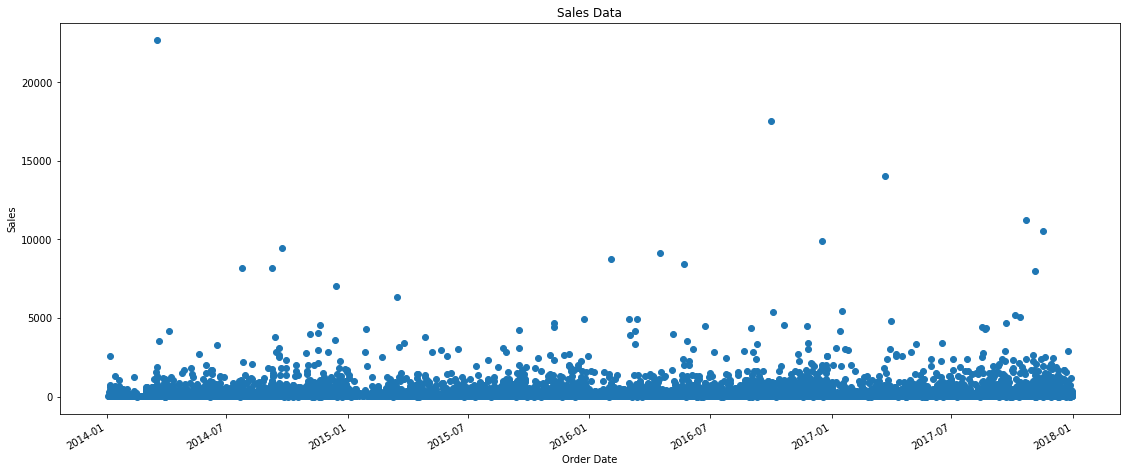

In [89]:
plt.plot_date(Order_date,Sales,xdate=True)
plt.gcf().autofmt_xdate()
plt.title('Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')

Deoarece axa X nu va afișa toate datele, este mai bine să utilizați un grafic interactiv, cum ar fi Rangeslider

In [90]:
import plotly.express as px

fig = px.line(salesplot, x=Order_date, y=Sales, title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Serii de timp cu ARIMA

In [91]:
df1=pd.read_csv('train1.csv')
df1.head()

,Unnamed: 0,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
0,0,2016-11-08,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2
1,1,2016-11-08,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,2,2016-06-12,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2
3,3,2015-10-11,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5
4,4,2015-10-11,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2


In [92]:
df1.shape

(9994, 14)

In [94]:
#pentru prognoza vânzărilor avem nevoie doar de Data comenzii și coloana Vânzări a trenului 1.csv
features=['Order Date','Sales']
dfs=df1[features]
dfs.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [95]:
dfs.shape

(9994, 2)

In [96]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9994 non-null   object 
 1   Sales       9994 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [97]:
dfs.tail()

,Order Date,Sales
9989,2014-01-21,25.248
9990,2017-02-26,91.960
9991,2017-02-26,258.576
9992,2017-02-26,29.600
9993,2017-05-04,243.160


In [98]:
dfs['Order Date'] = pd.to_datetime(dfs['Order Date'], errors = 'coerce')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


In [99]:
#setare index
dfs=dfs.groupby('Order Date')['Sales'].sum().reset_index()

In [100]:
dfs

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [101]:
dfs=dfs.set_index('Order Date')
dfs.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [102]:
#folosind începutul fiecărei luni ca marca temporală
y=dfs['Sales'].resample('MS').mean()

In [103]:
y['2015':]

Order Date
2015-01-01    1009.670867
2015-02-01     703.024176
2015-03-01    1489.471231
2015-04-01    1367.808340
2015-05-01    1115.988389
2015-06-01    1127.149636
2015-07-01    1198.555208
2015-08-01    1677.196918
2015-09-01    2583.836720
2015-10-01    1207.881673
2015-11-01    2713.305839
2015-12-01    2497.317373
2016-01-01     882.975762
2016-02-01     957.450625
2016-03-01    1846.995536
2016-04-01    1490.386115
2016-05-01    1965.094069
2016-06-01    1494.242000
2016-07-01    1570.478520
2016-08-01    1111.263368
2016-09-01    2621.786604
2016-10-01    2210.657222
2016-11-01    2738.343648
2016-12-01    3464.251536
2017-01-01    1911.798870
2017-02-01    1015.056670
2017-03-01    2102.584029
2017-04-01    1352.649485
2017-05-01    1639.300378
2017-06-01    2037.758681
2017-07-01    1560.841931
2017-08-01    2337.810667
2017-09-01    3138.094714
2017-10-01    2777.747257
2017-11-01    3948.260833
2017-12-01    2890.666166
Freq: MS, Name: Sales, dtype: float64

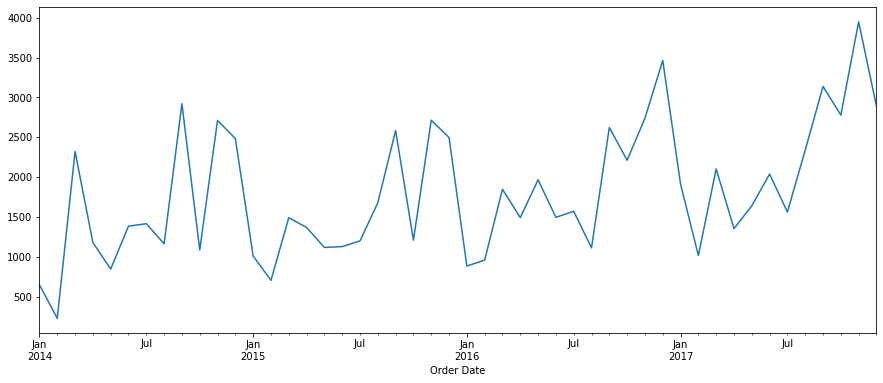

In [104]:
y.plot(figsize=(15,6))
plt.show()

Modelul arată că vânzările generale scad la începutul anului. De asemenea, rata de creștere a vânzărilor a crescut în cele din urmă din 2014 până în 2018.

Vizualizarea Tendințelor, precum și a sezonului în datele din seria timp

In [105]:
rcParams['figure.figsize']=19,9

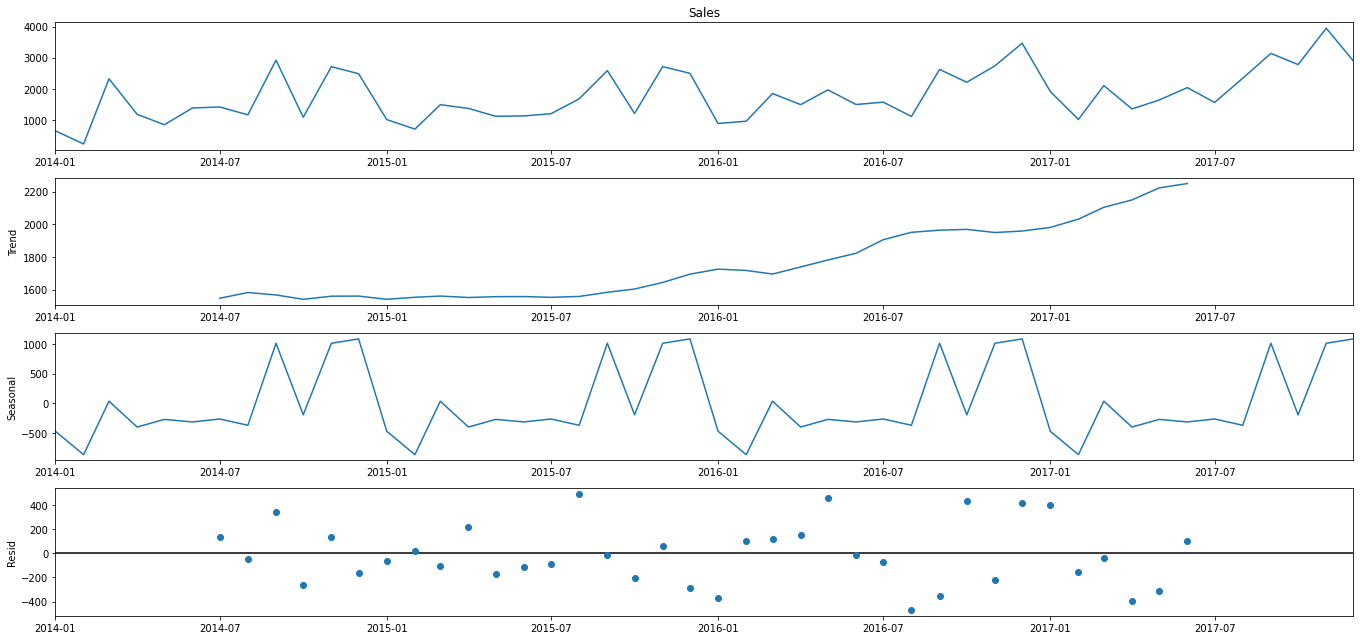

In [106]:
decomp=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomp.plot()
plt.show()

Primul grafic este cel OBSERVAT, care este graficul pe care l-am văzut în celula anterioară. Al doilea, arată tendința datelor de vânzări care cresc de la scăzut la mai mare pe parcursul a 3 ani. Sezonalitatea și graficul rezidual arată că vânzările sunt destul de instabile și trebuie să fie mărite pentru prognoze ulterioare

In [107]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seas_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [108]:
print('Some of the parameter combinations for Seasonal ARIMA:-')
print('SARIMAX: {} x {}'.format(pdq[1], seas_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seas_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seas_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seas_pdq[4]))

Some of the parameter combinations for Seasonal ARIMA:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
#folosind Grid Search pentru a găsi setul optim de parametri care oferă cea mai bună performanță pentru modelul nostru
#selectarea parametrilor pentru modelul nostru
for param in pdq:
    for param_seasonal in seas_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:849.2964734613763
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1796.05441278196
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:542.5524077991603
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:364.82273932499106
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:556.4030539681389
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1671.6830225296349
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:379.31311116746053
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:365.93920356275606
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:800.9546615001123
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2824.687511709094
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.8097917495901
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:349.6147790742613
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.3100438757025
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2663.962957128133
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:378.6443983832893
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:350.7521824880827
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:761.9496656386243
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1572.4795119841135
ARIMA(

Folosirea modelul ARIMA

In [110]:
mod=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12), enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0149      0.293      0.051      0.960      -0.559       0.589
ma.L1         -0.8884      0.212     -4.198      0.000      -1.303      -0.474
ar.S.L12      -0.0822      0.222     -0.370      0.711      -0.517       0.353
ma.S.L12      -1.0001      0.274     -3.656      0.000      -1.536      -0.464
sigma2      1.257e+05   2.18e-06   5.78e+10      0.000    1.26e+05    1.26e+05


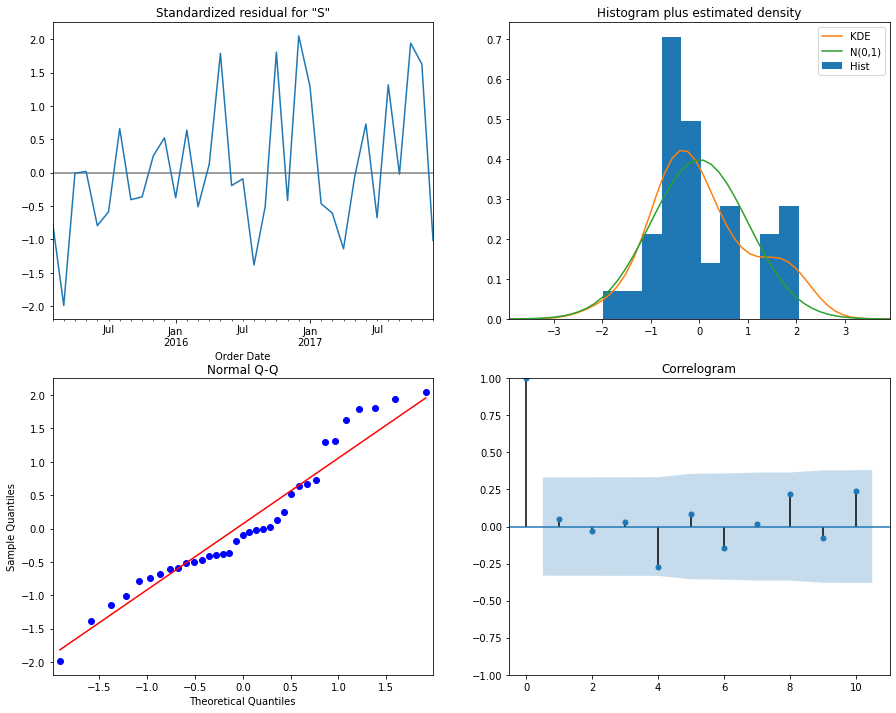

In [111]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


Statisticile de mai sus sugerează că reziduurile modelului nostru sunt distribuite aproximativ normal

Validarerea Modelului

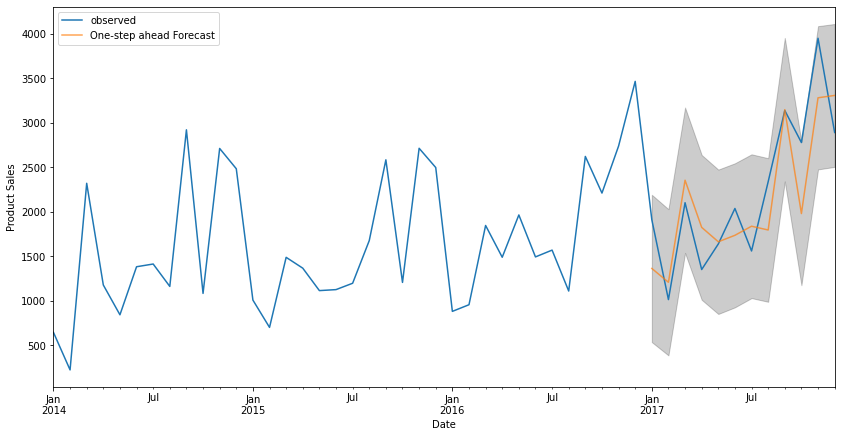

In [112]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

Graficul de mai sus compară previziunile observate cu cele prognozate în zona gri și se dovedește a fi destul de aproximativă.

Calcularea MSE si RMSE pentru modelul nostru

In [113]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

In [114]:
# mse
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 195090.08


In [115]:
# rmse
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 441.69


Mse și Rmse se dovedesc a nu fi atât de bune, deoarece aici analizăm vânzările generale și nu pe categorii de produse. Dar din analiza și validarea generală, modelul funcționează destul de bine

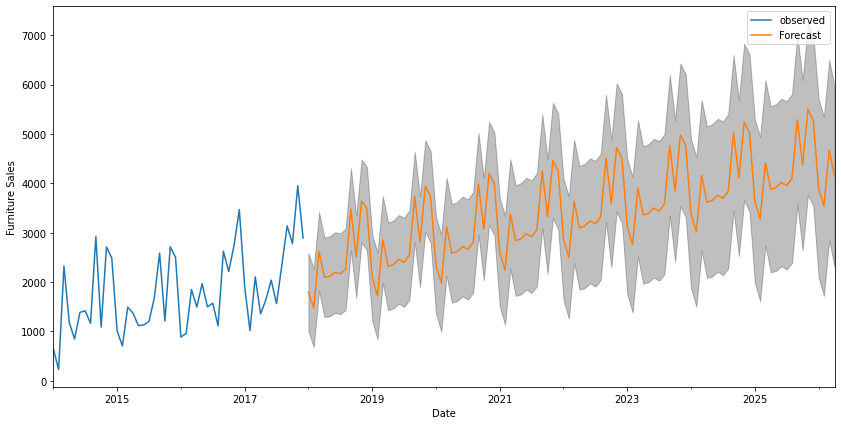

In [116]:
#Aceasta arată previziunile pentru următorii câțiva ani
pred_uc1 = results.get_forecast(steps=100)
pred_ci1 = pred_uc1.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

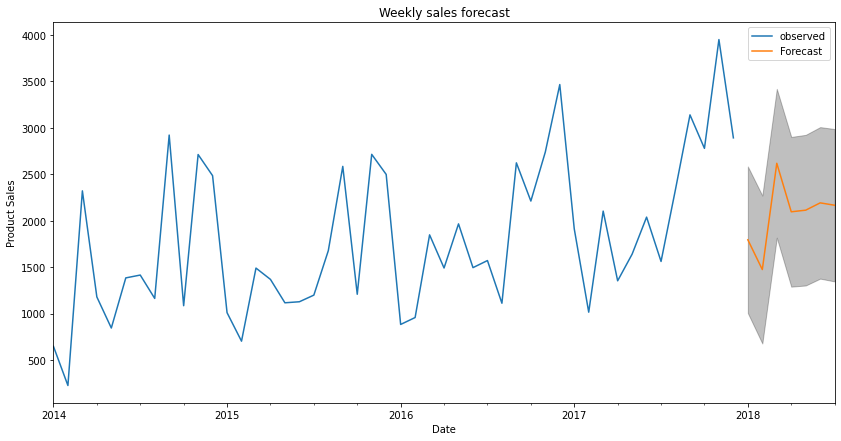

In [117]:
#Aceasta arată previziunile pentru următorii 7 zile
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.title('Weekly sales forecast', fontsize=12)
plt.legend()
plt.show()

Tabel final cu prognoza vânzărilor pe 7 zile

In [118]:
predicted_sale= pred_ci1[:7]

In [119]:
predicted_sale

,lower Sales,upper Sales
2018-01-01,1004.920262,2582.780074
2018-02-01,678.016602,2269.463158
2018-03-01,1816.448671,3417.848873
2018-04-01,1289.610202,2900.751836
2018-05-01,1302.253105,2923.062991
2018-06-01,1375.972534,3006.391616
2018-07-01,1345.787225,2985.759061


In [120]:
predicted_sale.to_csv('weeklyoutput_forecast.csv')

Acesta este tabelul final de producție pentru vânzările prognozate în următoarele 7 zile și arată că va exista o creștere moderată a ratei de vânzări în următoarele 7 zile.

Construirea tabelului de Sales confirmate și prognozate din care am calculat MSE și RMSE

In [121]:
y_truth.head()

Order Date
2017-01-01    1911.798870
2017-02-01    1015.056670
2017-03-01    2102.584029
2017-04-01    1352.649485
2017-05-01    1639.300378
Freq: MS, Name: Sales, dtype: float64

In [122]:
y_forecasted.head()

Order Date
2017-01-01    1364.701498
2017-02-01    1209.493183
2017-03-01    2354.948052
2017-04-01    1825.717525
2017-05-01    1663.926693
Freq: MS, Name: predicted_mean, dtype: float64

In [123]:
output = pd.concat([y_truth, y_forecasted], axis=1)

In [124]:
output.head()

,Sales,predicted_mean
Order Date,,
2017-01-01,1911.798870,1364.701498
2017-02-01,1015.056670,1209.493183
2017-03-01,2102.584029,2354.948052
2017-04-01,1352.649485,1825.717525
2017-05-01,1639.300378,1663.926693
